EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd



In [2]:
# Load the Excel file
file_path = 'online_retail_II.xlsx'
xls = pd.ExcelFile(file_path)



df_2009_2010 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df_2010_2011 = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Optionally, you can concatenate both DataFrames if needed
combined_df = pd.concat([df_2009_2010, df_2010_2011])

# Display the first few rows of the combined DataFrame
print(combined_df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [3]:
df_2009_2010.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
df_2010_2011.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
combined_df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom


In [6]:


# Check for missing values in each column of the combined DataFrame
print(combined_df.isnull().sum())



Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [7]:
combined_df= combined_df.dropna(subset=['Customer ID'])

In [8]:
combined_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
combined_df.duplicated().sum()


26479

In [10]:
combined_df = combined_df.drop_duplicates() 

In [11]:
combined_df.duplicated().sum()

0

In [12]:
from datetime import datetime 
from datetime import timedelta 
convert_dict = {'InvoiceDate': str} 
combined_df= combined_df.astype(convert_dict) 
print(combined_df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [13]:
combined_df['InvoiceDate'] = pd.to_datetime(combined_df['InvoiceDate'])


In [14]:
combined_df['order_date'] = [d.date() for d in combined_df['InvoiceDate']]


In [15]:
combined_df['order_time'] = [d.time() for d in combined_df['InvoiceDate']]


In [16]:
combined_df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [17]:
combined_df.head(4)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00


In [18]:
import datetime  # Ensure this line is at the top of your script

# Convert string to datetime object
date = datetime.datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')


In [19]:
combined_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,797885.000000,797885,797885.000000,797885.000000
mean,12.602980,2011-01-02 13:17:34.141160704,3.702732,15313.062777
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 09:47:00,1.250000,13964.000000
50%,5.000000,2010-12-02 12:33:00,1.950000,15228.000000
75%,12.000000,2011-07-31 15:50:00,3.750000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,191.670371,NaN,71.392549,1696.466663


In [20]:
combined_df=combined_df[(combined_df['Quantity']>0) & (combined_df['Price']>0)] 
combined_df.describe()
# The Quantity column has values greater than 0. This typically means you are excluding records where the quantity is zero or negative, which might indicate returns, errors, or non-sales transactions.
# The Price column has values greater than 0. This excludes records where the price is zero or negative, which could also indicate errors or special cases like giveaways.


,Quantity,InvoiceDate,Price,Customer ID
count,779425.000000,779425,779425.000000,779425.000000
mean,13.489370,2011-01-03 01:44:42.593475584,3.218488,15320.360461
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000
std,145.855814,NaN,29.676140,1695.692775


IDENTIFYING OUTLIERS

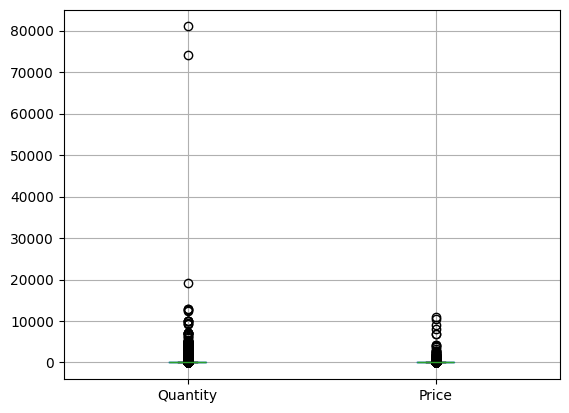

In [21]:
import matplotlib.pyplot as plt
combined_df.boxplot(column=['Quantity', 'Price'])
plt.show()


In [22]:
# Select only numeric columns from the DataFrame
numeric_cols = combined_df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numeric_cols[(numeric_cols < lower_bound) | (numeric_cols > upper_bound)]

# Display the outliers
outliers = outliers.dropna(how='all')  # Drop rows where all columns are NaN
print(outliers)


        Quantity  Price  Customer ID
3           48.0    NaN          NaN
22           NaN   8.50          NaN
35           NaN   9.95          NaN
38           NaN   8.95          NaN
54          28.0    NaN          NaN
...          ...    ...          ...
541866      36.0    NaN          NaN
541867      72.0    NaN          NaN
541868      48.0    NaN          NaN
541892       NaN   8.95          NaN
541909       NaN  18.00          NaN

[116052 rows x 3 columns]


In [23]:
combined_df_capped = combined_df.copy()
for col in numeric_cols.columns:
    combined_df_capped[col] = combined_df_capped[col].clip(lower_bound[col], upper_bound[col])


In [24]:
combined_df_capped.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [25]:
combined_df_capped.describe()
# Yes, this is okay, if your goal was to reduce the impact of extreme outliers in the Quantity and Price columns. The results show that the capping process worked as intended, leading to more moderate statistics in both columns. This will generally lead to more robust statistical analyses that aren't overly influenced by extreme values.

,Quantity,InvoiceDate,Price,Customer ID
count,779425.000000,779425,779425.000000,779425.000000
mean,8.285808,2011-01-03 01:44:42.593475584,2.654312,15320.360461
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000
std,8.083299,NaN,2.120267,1695.692775


 The RFM values can be grouped in several ways. We are going to implement percentile-based grouping.

In [26]:
combined_df_capped['TotalSum'] = combined_df_capped['Price'] * combined_df_capped['Quantity']


In [27]:
import pandas as pd
import datetime as dt

# Ensure 'order_date' is in datetime format
combined_df_capped['order_date'] = pd.to_datetime(combined_df_capped['order_date'])

# Add new TotalSum column
combined_df_capped['TotalSum'] = combined_df_capped['Price'] * combined_df_capped['Quantity']

# Display minimum and maximum invoice dates
print('Min Invoice Date:', combined_df_capped['order_date'].dt.date.min(), 'Max Invoice Date:', combined_df_capped['order_date'].dt.date.max())

# Preview the DataFrame
combined_df_capped.head(3)

# Set the snapshot date to one day after the last purchase date
snapshot_date = combined_df_capped['order_date'].max() + dt.timedelta(days=1)
print('Snapshot Date:', snapshot_date)


Min Invoice Date: 2009-12-01 Max Invoice Date: 2011-12-09
Snapshot Date: 2011-12-10 00:00:00


In [28]:
combined_df_capped.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time,TotalSum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0


 Calculate RFM Metrics

In [29]:
rfm = combined_df_capped.groupby(['Customer ID']).agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'TotalSum': 'sum'
})
rfm

# f.groupby(['CustomerID']): Groups the data by CustomerID, meaning that all transactions for each customer will be aggregated together.

# agg(): This function allows you to apply different aggregation functions to different columns.

# 'order_date': lambda x: (snapshot_date - x.max()).days: This lambda function calculates the Recency by finding the difference in days between the snapshot date (snapshot_date) and the most recent purchase date (x.max()). The result tells you how many days it has been since the customer's last purchase.

# 'InvoiceNo': 'count': This counts the number of invoices (transactions) for each customer, giving you the Frequency of their purchases.

# 'TotalSum': 'sum': This sums up the total amount spent by each customer across all their transactions, representing the Monetary Value.

,order_date,Invoice,TotalSum
Customer ID,,,
12346.0,326,34,400.94
12347.0,3,222,4473.22
12348.0,76,51,779.73
12349.0,19,175,3347.99
12350.0,311,17,301.90
...,...,...,...
18283.0,4,938,2631.25
18284.0,432,28,374.03
18285.0,661,12,229.55


In [30]:
rfm.rename(columns={'order_date':'Recency','Invoice':'Frequency','TotalSum':'MonetaryValue'}, inplace=True)


In [31]:
rfm.head()
# Customer 12347.0: This customer has a very low Recency value (3 days), indicating they made a purchase very recently. They also have high Frequency (222 purchases) and high Monetary Value ($4,473.22), making them a very valuable customer.

# Customer 12346.0: This customer has a high Recency value (326 days), meaning they haven't made a purchase in a long time. They also have relatively low Frequency (34 purchases) and lower Monetary Value ($400.94) compared to others. This customer may need re-engagement.

# Customer 12349.0: With a Recency of 19 days, this customer has made a purchase recently. They have a high Frequency (175 purchases) and a significant Monetary Value ($3,347.99), indicating that they are also a valuable customer.



,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,326,34,400.94
12347.0,3,222,4473.22
12348.0,76,51,779.73
12349.0,19,175,3347.99
12350.0,311,17,301.90


Building RFM Segments and RFM Score

In [32]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
 # r_labels: These labels (4, 3, 2, 1) are assigned to the Recency quartiles. A Recency value of 4 means the customer is very recent (highly engaged), and 1 means they are not recent (less engaged).

# f_labels and m_labels: These labels (1, 2, 3, 4) are assigned to the Frequency and MonetaryValue quartiles, where 4 represents the highest frequency and monetary value, and 1 represents the lowest.

In [33]:
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

# pd.qcut(): This function divides the data into four equal-sized quartiles for each of the R, F, and M metrics.

# Assigning Labels: After dividing the data into quartiles, each customer is assigned a label according to their quartile position. For instance, a customer in the top 25% for Recency will receive a label of 4, and one in the bottom 25% will receive a label of 1.

In [34]:
rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)
# assign(): This method is used to add the quartile labels as new columns (R, F, M) to the rfm DataFrame.

In [35]:
def add_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)

# add_rfm Function: This function creates a unique RFM segment code for each customer by concatenating their R, F, and M labels into a single string.

# For example, if a customer has R=3, F=2, and M=4, their RFM_Segment will be "324".
# apply(): This function applies add_rfm to each row of the DataFrame, creating the RFM_Segment column.

In [36]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
# RFM_Score: The sum of the R, F, and M scores. This gives a single score that combines all three metrics.
# A higher RFM_Score indicates a more valuable customer, as they are recent, frequent, and spend more.

In [37]:
rfm.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,326,34,400.94,2,2,2,2.02.02.0,6
12347.0,3,222,4473.22,4,4,4,4.04.04.0,12
12348.0,76,51,779.73,3,2,3,3.02.03.0,8
12349.0,19,175,3347.99,4,4,4,4.04.04.0,12
12350.0,311,17,301.90,2,1,2,2.01.02.0,5


 Summary metrics per RFM Score

In [38]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)
# Grouping by RFM_Score: The groupby('RFM_Score') function groups the data by the RFM_Score you calculated earlier.
# Aggregating Metrics:
# Recency: Calculates the mean recency for each RFM_Score group.
# Frequency: Calculates the mean frequency for each RFM_Score group.
# MonetaryValue: Calculates both the mean and count of monetary values for each RFM_Score group.
# round(1): Rounds the results to one decimal place for better readability.


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           543.3       8.8         138.1   556
4           376.4      16.4         210.9   585
5           310.5      23.9         341.6   611
6           228.1      34.2         476.7   622
7           198.2      51.0         731.0   599
8           151.3      72.7        1024.7   617
9            96.9     106.8        1451.2   544
10           72.7     170.0        2442.7   556
11           37.2     269.7        3897.8   556
12           10.8     555.6        9130.2   632

In [39]:
def segments(combined_df_capped):
    if combined_df_capped['RFM_Score'] > 9:
        return 'Gold'
    elif (combined_df_capped['RFM_Score'] > 5) and (combined_df_capped['RFM_Score'] <= 9):
        return 'Silver'
    else:
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments, axis=1)


In [40]:
rfm.groupby('General_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)
# Bronze Segment:

# Recency: 406.4 days on average since the last purchase.
# Frequency: Customers in this segment made an average of 16.6 purchases.
# Monetary Value: On average, these customers spent 233.4 units of currency.
# Count: There are 1,752 customers in this segment.


# Silver Segment:

# Recency: 170.7 days on average since the last purchase.
# Frequency: Customers made an average of 65.0 purchases.
# Monetary Value: On average, these customers spent 905.1 units of currency.
# Count: There are 2,382 customers in this segment.


# Gold Segment:

# Recency: 38.9 days on average since the last purchase.
# Frequency: These customers made an average of 341.5 purchases.
# Monetary Value: On average, these customers spent 5,330.1 units of currency.
# Count: There are 1,744 customers in this segment.

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            406.4      16.6         233.4  1752
Gold               38.9     341.5        5330.1  1744
Silver            170.7      65.0         905.1  2382

In [41]:
mdf = pd.merge(combined_df_capped, rfm, on='Customer ID')


In [42]:
# Creating data frames for each RFM segment
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']  # Bronze segment
Silver_seg = mdf[mdf.General_Segment == 'Silver']  # Silver segment
Gold_seg = mdf[mdf.General_Segment == 'Gold']      # Gold segment

# Displaying the first few rows of each segment to verify
print("Bronze Segment:")
print(Bronze_seg.head())

print("\nSilver Segment:")
print(Silver_seg.head())

print("\nGold Segment:")
print(Gold_seg.head())


Bronze Segment:
   Invoice StockCode                        Description  Quantity  \
31  489437     22143  CHRISTMAS CRAFT HEART DECORATIONS         6   
32  489437     22145    CHRISTMAS CRAFT HEART STOCKING          6   
33  489437     22130   PARTY CONE CHRISTMAS DECORATION         12   
34  489437     21364           PEACE SMALL WOOD LETTERS         2   
35  489437     21360             JOY LARGE WOOD LETTERS         1   

           InvoiceDate  Price  Customer ID         Country order_date  \
31 2009-12-01 09:08:00   2.10      15362.0  United Kingdom 2009-12-01   
32 2009-12-01 09:08:00   2.10      15362.0  United Kingdom 2009-12-01   
33 2009-12-01 09:08:00   0.85      15362.0  United Kingdom 2009-12-01   
34 2009-12-01 09:08:00   6.75      15362.0  United Kingdom 2009-12-01   
35 2009-12-01 09:08:00   7.50      15362.0  United Kingdom 2009-12-01   

   order_time  TotalSum  Recency  Frequency  MonetaryValue  R  F  M  \
31   09:08:00      12.6      449         40         582.15 


Data Pre-Processing for K-means Clustering


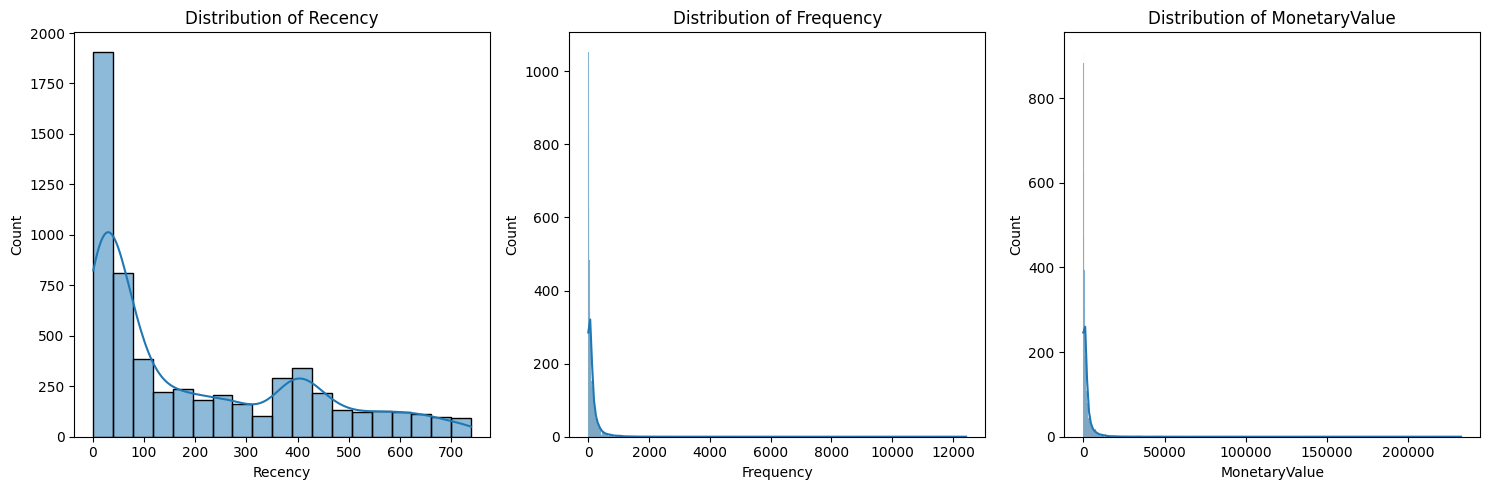

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Recency, Frequency, and MonetaryValue
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['MonetaryValue'], kde=True)
plt.title('Distribution of MonetaryValue')

plt.tight_layout()
plt.show()


In [44]:
# Checking skewness
skewness = rfm[['Recency', 'Frequency', 'MonetaryValue']].skew()
print(skewness)


Recency           0.887194
Frequency        18.162730
MonetaryValue    18.662837
dtype: float64


Data Pre-Processing for K-means Clustering

In [45]:
rfm_selected = rfm[['Recency', 'Frequency', 'MonetaryValue']]
print(rfm_selected.describe())


# his code will display summary statistics (mean, variance, etc.) for the selected variables. If the mean and variance of these variables are not equal, it indicates a problem that needs to be addressed.
# for the Recency, Frequency, and MonetaryValue variables, it’s clear that the data violates some of the key assumptions for K-means clustering:
# Different Means and Variances:2

# The mean values for Recency, Frequency, and MonetaryValue are significantly different.
# The standard deviations (std) also vary widely, particularly for Frequency and MonetaryValue, which have much larger variances compared to Recency.
# Wide Range of Values:

# There is a considerable range in the data, especially for Frequency and MonetaryValue. For example, Frequency ranges from 1 to 12,435, and MonetaryValue ranges from 2.95 to 232,375.5. This disparity can lead to issues when calculating distances during clustering, as variables with larger ranges will dominate the results.
#Recommended Steps for Pre-Processing



           Recency     Frequency  MonetaryValue
count  5878.000000   5878.000000    5878.000000
mean    201.866791    132.600374    2017.806638
std     209.353961    342.190092    5865.759937
min       1.000000      1.000000       2.950000
25%      26.000000     20.000000     294.037500
50%      96.000000     52.000000     742.040000
75%     380.000000    138.000000    1904.200000
max     739.000000  12435.000000  232375.500000


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])


In [47]:
import numpy as np
rfm['Recency_log'] = np.log(rfm['Recency'] + 1)
rfm['Frequency_log'] = np.log(rfm['Frequency'] + 1)
rfm['MonetaryValue_log'] = np.log(rfm['MonetaryValue'] + 1)


In [48]:
rfm_log_scaled = scaler.fit_transform(rfm[['Recency_log', 'Frequency_log', 'MonetaryValue_log']])


C:\Users\USER\AppData\Local\Temp\ipykernel_8236\613563853.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency_log'], label='Recency (Log Transformed)')
C:\Users\USER\AppData\Local\Temp\ipykernel_8236\613563853.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency_log'],

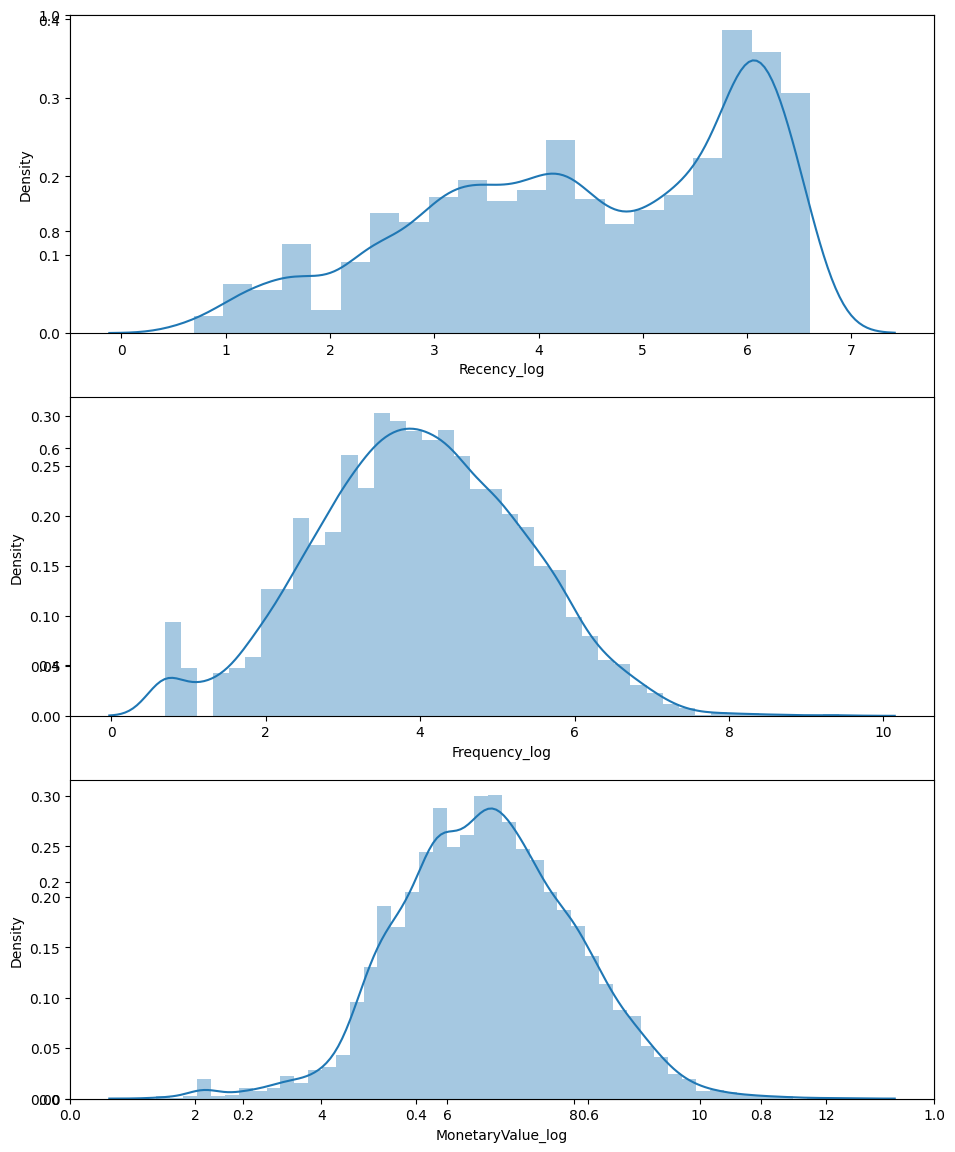

In [49]:
f, ax = plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency_log'], label='Recency (Log Transformed)')
plt.subplot(3, 1, 2)
sns.distplot(rfm['Frequency_log'], label='Frequency (Log Transformed)')
plt.subplot(3, 1, 3)
sns.distplot(rfm['MonetaryValue_log'], label='Monetary Value (Log Transformed)')

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_log', 'Frequency_log', 'MonetaryValue_log']])


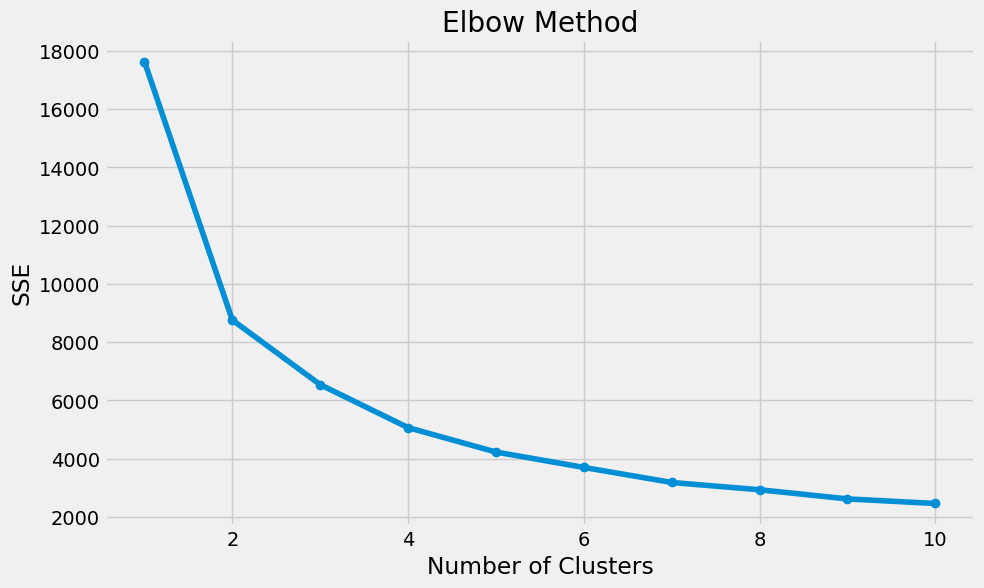

In [52]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()
# As the number of clusters increases, the SSE tends to decrease because points are closer to the centroids.
# The goal is to find the "elbow point" where the rate of decrease sharply slows down, indicating diminishing returns in terms of SSE reduction.
# Interpretation: In your plot, the elbow appears around k = 3 or 4, suggesting that this is the optimal number of clusters to use.
# Use the Elbow method to find the optimal number of clusters by plotting the sum of squared distances from each point to its assigned cluster center.

In [53]:
k = 4  # Replace with the optimal number from the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


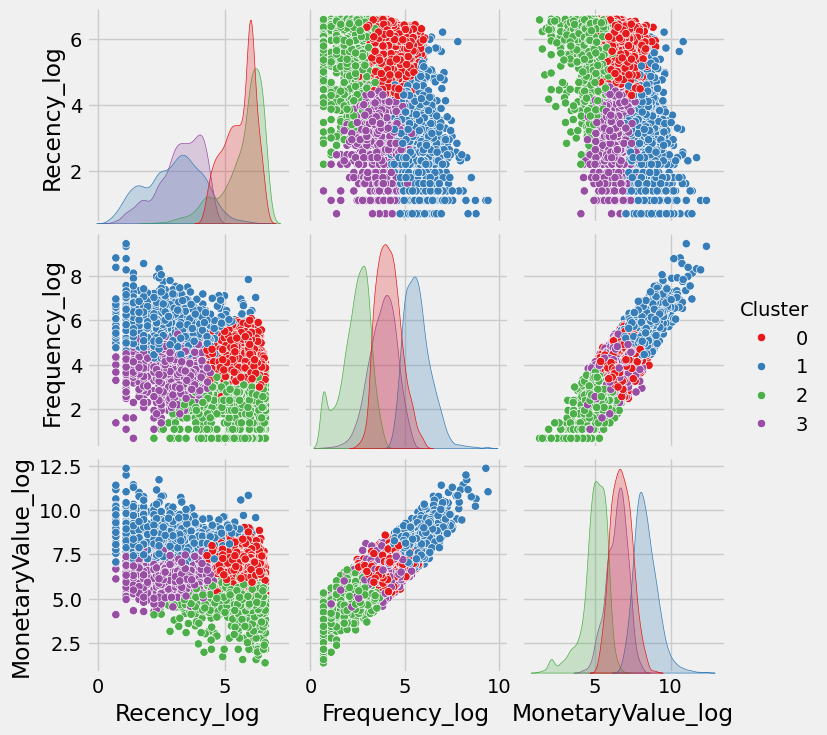

In [54]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency_log', 'Frequency_log', 'MonetaryValue_log'], palette='Set1')
plt.show()

#t's clear that the mean and variance of your variables (Recency, Frequency, and Monetary Value) are quite different.
# Solution: Scaling the variables using a scaler from the scikit-learn library helps standardize the data, ensuring each variable contributes equally.
# Each subplot shows the relationship between two features (e.g., Recency_log, Frequency_log, and MonetaryValue_log), with data points colored by their cluster labels.
# Diagonal plots show the distribution (density) of each feature for the different clusters.
# Explanation:

# Cluster Colors: Different clusters are represented by different colors (e.g., red, blue, green, purple).
# Cluster Separation: You can see how well-separated the clusters are based on the feature pairs. Ideally, there should be minimal overlap between clusters, indicating that the features are distinguishing the groups effectively.
## Feature Distributions: The diagonal plots (density plots) show how each feature is distributed within each cluster. Differences in these distributions across clusters suggest that these features are important in defining the clusters.
# Interpretation:

# You can see that the clusters are fairly distinct in terms of the feature combinations, which indicates a successful clustering.
# Some clusters may overlap slightly, but overall, the separation is clear enough to differentiate the customer segments effectively.

FIRST SNAKE PLOT

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming your RFM DataFrame looks like this:
# rfm = pd.DataFrame({
#     'Recency': [...],
#     'Frequency': [...],
#     'Monetary': [...]
# })

# Extract the RFM values for clustering
rfm_rfm = rfm[['Recency', 'Frequency', 'MonetaryValue']]

# Normalize the data
scaler = StandardScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_rfm), 
                              index=rfm_rfm.index, 
                              columns=rfm_rfm.columns)

# Perform clustering (assuming KMeans clustering has been done already)
kc = KMeans(n_clusters=4)  # Replace with the number of clusters you want
kc.fit(rfm_normalized)

# Add the cluster labels to the normalized data
rfm_normalized['K_Cluster'] = kc.labels_

# If you want to combine the cluster labels back with the original RFM data:
rfm['K_Cluster'] = rfm_normalized['K_Cluster']

# Now you can analyze or visualize your clusters


In [56]:
print(rfm.columns)


Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_Segment',
       'RFM_Score', 'General_Segment', 'Recency_log', 'Frequency_log',
       'MonetaryValue_log', 'Cluster', 'K_Cluster'],
      dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_8236\2585584998.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


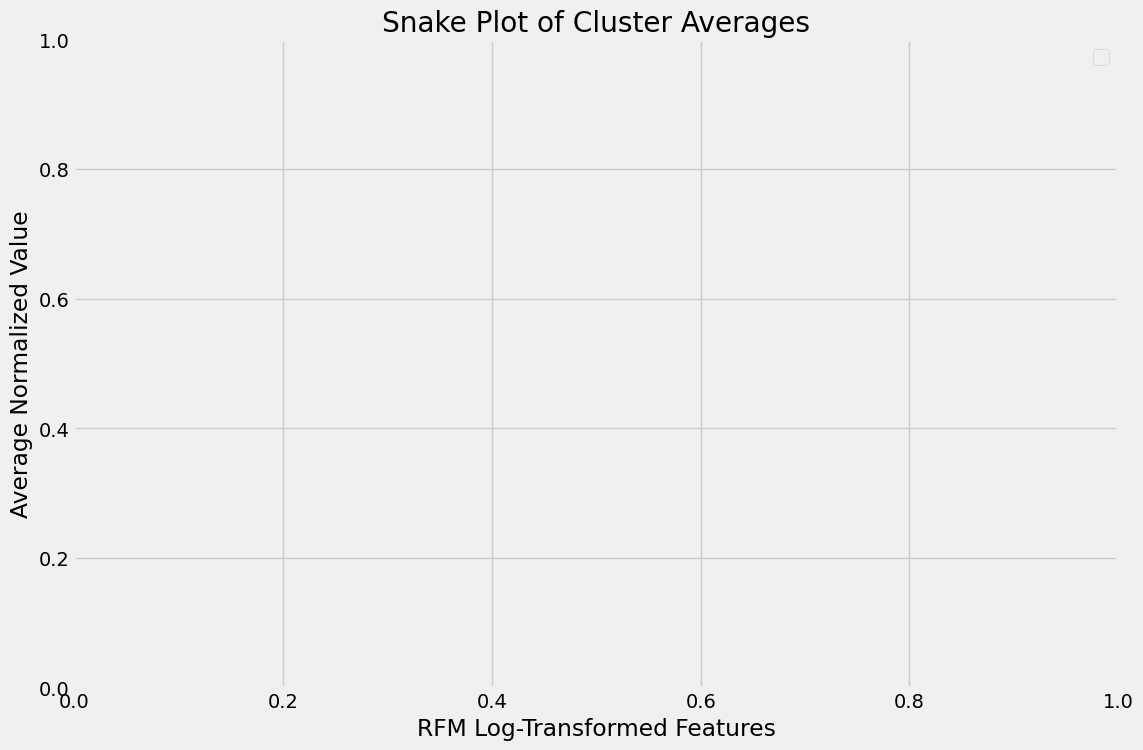

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Markdown Explanation: 
# **Step 1: Normalize the data**
# To ensure fair comparison between different attributes, we need to normalize the data.
# This process involves centering the data (subtracting the mean) and scaling it (dividing by the standard deviation).
# This ensures that all features contribute equally to the distance computations in K-means.

# Select the features to be used in clustering
features = ['Recency_log', 'Frequency_log', 'MonetaryValue_log']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_normalized = scaler.fit_transform(rfm[features])

# Convert the numpy array back to a DataFrame for easier handling
rfm_normalized = pd.DataFrame(rfm_normalized, columns=features)

# Add the cluster labels to the normalized DataFrame
rfm_normalized['Cluster'] = rfm['Cluster']

# Markdown Explanation:
# **Step 2: Calculate the average values for each cluster**
# We group the data by clusters and then calculate the mean of each feature within each cluster.
# This gives us the "profile" of each cluster, showing how each attribute behaves on average in that cluster.

# Calculate the mean values for each cluster
cluster_avg = rfm_normalized.groupby('Cluster').mean()

# Markdown Explanation:
# **Step 3: Plotting the snake plots**
# We use Seaborn to create line plots that represent the average values of each feature for each cluster.
# Each line in the plot corresponds to a different cluster, and the X-axis represents the different features.
# This visual representation allows us to compare the clusters easily.

# Transpose the data so that each attribute is a column and each cluster is a row
cluster_avg = cluster_avg.T

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the snake plot for each cluster
for i in range(cluster_avg.shape[1]):
    plt.plot(cluster_avg.index, cluster_avg.iloc[:, i], marker='o', label=f'Cluster {i}')

# Add titles and labels
plt.title('Snake Plot of Cluster Averages')
plt.xlabel('RFM Log-Transformed Features')
plt.ylabel('Average Normalized Value')
plt.legend()
plt.show()

# Markdown Explanation:
# **Step 4: Interpret the Snake Plot**

# - The snake plot shows how different clusters compare across the different attributes.
# - The Y-axis represents the average normalized value of each feature, allowing us to see relative differences.
# - By comparing the lines (clusters), we can identify which clusters are characterized by high or low values in specific features.

 Snake Plots to Understand and Compare Segments

In [58]:
rfm_normalized = rfm_rfm.apply(lambda x: (x - x.mean()) / x.std())


In [59]:
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm_rfm.index, columns=rfm_rfm.columns)


In [60]:
rfm_normalized['K_Cluster'] = kc.labels_


In [61]:
rfm_normalized['General_Segment'] = rfm['General_Segment']


In [62]:
rfm_normalized.reset_index(inplace=True)


In [63]:
rfm_melt = pd.melt(rfm_normalized, id_vars=['Customer ID', 'General_Segment', 'K_Cluster'], 
                   value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                   var_name='Metric', value_name='Value')


In [64]:
rfm_melt.head()


,Customer ID,General_Segment,K_Cluster,Metric,Value
0,12346.0,Silver,0,Recency,0.592935
1,12347.0,Gold,1,Recency,-0.949907
2,12348.0,Silver,1,Recency,-0.601215
3,12349.0,Gold,1,Recency,-0.873481
4,12350.0,Bronze,0,Recency,0.521286


Structure Breakdown:
Customer ID: This column uniquely identifies each customer.
General_Segment: This column categorizes customers into segments like "Gold," "Silver," and "Bronze" based on your RFM analysis.
K_Cluster: This column represents the cluster each customer belongs to, as determined by the K-Means clustering algorithm. The clusters are labeled with integers (e.g., 0, 1, 2).
Metric: This column indicates which RFM metric the value corresponds to. It can be "Recency," "Frequency," or "MonetaryValue."
Value: This column contains the normalized value of the metric for the corresponding customer.
Example Row Explanation:
Row 0: Customer ID 12346.0 belongs to the "Silver" segment and is placed in cluster 2 by the K-Means algorithm. The value of their normalized "Recency" metric is 0.592935.
Row 1: Customer ID 12347.0 belongs to the "Gold" segment and is in cluster 0. The normalized "Recency" value is -0.949907.

 Snake Plot

In [65]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))


In [66]:
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt, ax=ax1)


<Axes: xlabel='Metric', ylabel='Value'>

In [67]:
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt, ax=ax2)


<Axes: xlabel='Metric', ylabel='Value'>

In [68]:
plt.suptitle("Snake Plot of RFM", fontsize=24)


Text(0.5, 0.98, 'Snake Plot of RFM')

Snake Plot of RFM - Extensive Breakdown
Overview
The image presents two "Snake Plots" that visualize customer segmentation based on Recency, Frequency, and Monetary (RFM) metrics. Each plot compares different segments of customers to provide insights into their behaviors.

Plot Description
Left Plot: General Segment
X-axis (Metric): The three RFM metrics:

Recency: How recently a customer made a purchase.
Frequency: How often the customer makes a purchase.
MonetaryValue: How much money the customer spends.
Y-axis (Value): The normalized values of these metrics, where higher values indicate higher Recency, Frequency, or Monetary Value relative to other customers.

Hue (General_Segment):

Silver (Blue Line)
Gold (Red Line)
Bronze (Yellow Line)
Key Observations:

Recency:
The Gold segment has a negative Recency value, indicating they made a purchase longer ago compared to the other segments.
The Silver segment has relatively consistent behavior across Recency, Frequency, and MonetaryValue.
The Bronze segment shows a steep increase in Recency, suggesting they are the most recent purchasers.
Frequency and MonetaryValue:
Gold customers tend to have the highest Frequency and MonetaryValue, implying they purchase often and spend more.
Bronze customers, while recent, have lower Frequency and MonetaryValue.
Right Plot: K-Means Cluster
X-axis (Metric): The same RFM metrics: Recency, Frequency, MonetaryValue.

Y-axis (Value): The values here represent the clusters formed by the K-Means algorithm, which groups customers with similar purchasing behaviors.

Hue (K_Cluster):

Cluster 0 (Light Pink Line)
Cluster 1 (Pink Line)
Cluster 2 (Dark Purple Line)
Cluster 3 (Purple Line)
Key Observations:

Cluster 1 (Pink Line):
This cluster stands out with very high values across all three metrics, particularly in MonetaryValue, indicating this cluster comprises the highest spenders.
Cluster 0 (Light Pink Line):
This group has moderate values for all three metrics.
Cluster 2 & 3 (Dark Purple and Purple Lines):
These clusters show lower values for Recency, Frequency, and MonetaryValue, indicating they represent less active or less valuable customers.
Comparison Between Plots
General Segment vs. K-Means Clusters:
The General Segment plot provides an overview based on predefined categories (Silver, Gold, Bronze), while the K-Means plot reflects clusters based on actual customer behavior patterns.
The Gold segment (high Frequency and MonetaryValue) appears to align somewhat with Cluster 1 in the K-Means plot, suggesting that this clustering method successfully groups high-value customers together.
The Bronze segment in the General Segment plot shows high Recency but lower Frequency and MonetaryValue, which may correspond to one of the lower K-Means clusters, potentially indicating that these customers, despite their recent activity, do not spend as much or purchase as frequently.
Conclusion
The Snake Plots effectively compare different customer segments across key purchasing behaviors, providing insights into how these groups behave relative to each other. This comparison between predefined segments (like Gold, Silver, Bronze) and algorithmically determined clusters (K-Means) helps businesses understand and refine their customer segmentation strategy.

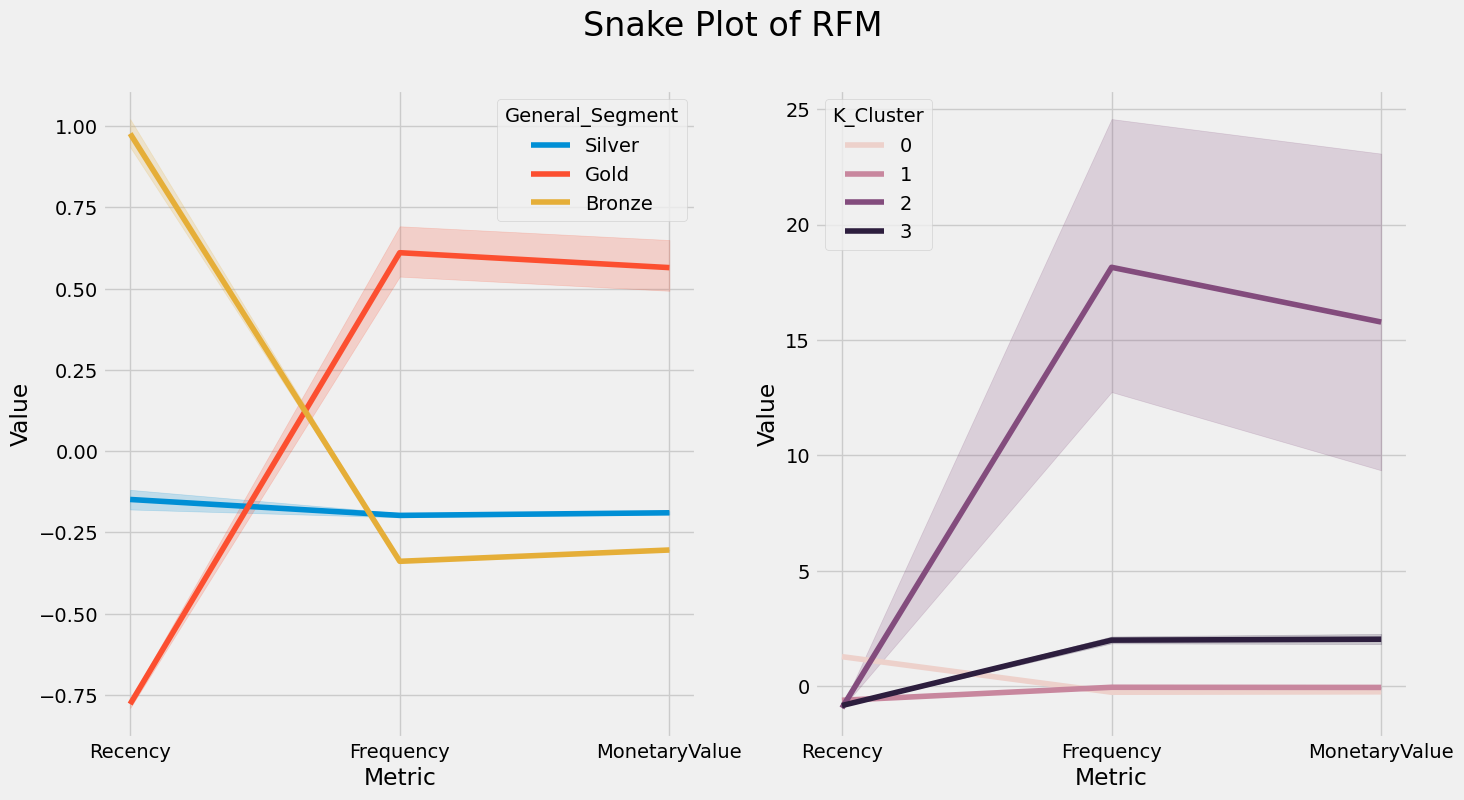

In [69]:
plt.show()


In [70]:
# Snake Plot: The snake plot is a line plot where each line represents a different customer segment (based on RFM analysis or clustering). The x axis represents the RFM metrics, and the y axis shows the normalized values of these metrics.
# General Segment vs. K-Means Cluster: By plotting both the general segments and the K-Means clusters side by side, you can visually compare how these customer groupings differ across the RFM metrics. This can help identify which clustering method better distinguishes between customer behaviors.


Market Basket Analysis Using the Apriori Algorithm


Market Basket Analysis is a data mining technique used to identify associations between different items in a dataset, particularly in transaction data. The Apriori algorithm is commonly used in this analysis to find frequent itemsets and generate association rules. This breakdown will guide you through the steps you've taken and explain the process in detail.

In [71]:
basket_bronze = (Bronze_seg.groupby(['Invoice', 'Description'])['Quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('Invoice'))

# Purpose: This step creates a pivot table where each row represents an invoice, and each column represents a product description. The cell values are the summed quantities of each product for that invoice.
# Unstacking and Resetting Index: This transforms the grouped data into a wide format where each product has its own column.
# Fillna(0): This fills any missing values with 0, indicating that the product was not purchased in that transaction.
# Set Index: The InvoiceNo becomes the index, making it easier to manage transactions.


In [72]:
basket_bronze_copy = basket_bronze.copy()
basket_bronze_copy = basket_bronze_copy.astype(int)


In [73]:
def encode_units(x):
    if x <= 0: return 0
    if x >= 1: return 1
# Purpose: This function encodes the quantities into binary values:
# 0 indicates the product was not purchased in a transaction.
# 1 indicates the product was purchased.


In [74]:
basket_bronze_copy = basket_bronze.copy()
basket_bronze_sets = basket_bronze_copy.applymap(encode_units)
basket_bronze_sets.drop('POSTAGE', inplace=True, axis=1)
# Purpose: The function is applied to all values in the dataset to convert them into binary values, making the dataset suitable for the Apriori algorithm.
# Dropping POSTAGE: The POSTAGE column is removed, as it's likely not relevant for identifying purchasing patterns.

C:\Users\USER\AppData\Local\Temp\ipykernel_8236\480576250.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_bronze_sets = basket_bronze_copy.applymap(encode_units)


In [75]:

from mlxtend.frequent_patterns import apriori, association_rules
# Purpose: These libraries provide functions to perform the Apriori algorithm and generate association rules.


In [76]:
frequent_itemsets_bronze = apriori(basket_bronze_sets, min_support=0.03, use_colnames=True)
frequent_itemsets_bronze['length'] = frequent_itemsets_bronze['itemsets'].apply(lambda x: len(x))
# min_support=0.03: This parameter ensures that only itemsets that appear in at least 3% of all transactions are considered frequent.
# use_colnames=True: This keeps the column names of the original items in the results.
# Adding the Length of Itemsets: A new column is added to the frequent_itemsets_bronze DataFrame, representing the number of items in each itemset.

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:
rules_bronze = association_rules(frequent_itemsets_bronze, metric="lift", min_threshold=1)
# Purpose: The association_rules function generates rules based on the frequent itemsets.
# Metric = "lift": Lift is used to measure the strength of the rule, where a lift greater than 1 indicates a strong association.
# min_threshold=1: Ensures only rules with a lift of at least 1 are included.

In [78]:
rules_bronze[(rules_bronze['lift'] >= 6) & (rules_bronze['confidence'] >= 0.7)]
# Purpose: This filters the association rules to find the strongest relationships.
# Conditions:
# Lift >= 6: This means the likelihood of items being purchased together is six times higher than what would be expected if they were independent.
# Confidence >= 0.7: Indicates that in 70% of the cases where the antecedent (left-hand side of the rule) is bought, the consequent (right-hand side) is also bought.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


The result you're seeing is a typical output of the association_rules function in a Market Basket Analysis using the Apriori algorithm. Here's an explanation of each column:

antecedents: The itemset(s) on the left-hand side (LHS) of the rule. These are the items that, when purchased, lead to the purchase of the consequents.

consequents: The itemset(s) on the right-hand side (RHS) of the rule. These are the items that are likely to be purchased when the antecedents are purchased.

antecedent support: The proportion of transactions that include the antecedent itemset(s). This gives you an idea of how frequently the antecedents appear in the dataset.

consequent support: The proportion of transactions that include the consequent itemset(s). This shows how often the consequents appear in the dataset.

support: The proportion of transactions that include both the antecedents and consequents. It represents the frequency with which the entire rule is found to be true.

confidence: The likelihood that the consequents are purchased when the antecedents are purchased. It's calculated as support / antecedent support. High confidence indicates a strong relationship.

lift: The ratio of the observed support to that expected if the antecedents and consequents were independent. A lift greater than 1 indicates a positive correlation between the antecedents and consequents.

leverage: Measures the difference between the observed support and the expected support if the antecedents and consequents were independent. A leverage close to 0 suggests independence, while a larger leverage indicates a stronger association.

conviction: Measures the effect of the rule on the likelihood of the consequents not being purchased if the antecedents are present. Conviction values greater than 1 indicate a positive relationship between antecedents and consequents.

zhangs_metric: This is another measure of association strength. It is particularly useful for rules with low support, as it doesn't exaggerate the importance of less frequent itemsets.

Is This Result OK?
Yes, this is a standard and comprehensive output for association rules. It includes all the essential metrics needed to evaluate the strength and significance of the associations identified by the Apriori algorithm.

Confidence and lift are the primary metrics to focus on, as they indicate the strength of the rule.
Support helps you understand how often the rule applies in the dataset.
Leverage and conviction provide additional context on the rule's strength.
Zhang's metric offers a nuanced view, especially for low-support rules.

What Each Column Represents
Antecedents: This column shows the item(s) on the left-hand side (LHS) of the rule, which are the items that customers buy before or along with the items on the right-hand side.

Consequents: This column shows the item(s) on the right-hand side (RHS) of the rule, which are the items that are likely to be bought if the antecedents are bought.

For example, if one row shows:

Antecedents: {'bread'}
Consequents: {'butter'}
This means that customers who buy bread are likely to buy butter as well.

Antecedent Support: This column shows the proportion of transactions that include the antecedent item(s).

Consequent Support: This shows the proportion of transactions that include the consequent item(s).

Support: This is the proportion of transactions that include both the antecedent and consequent items. It's a measure of how frequently the rule appears in the dataset.

Confidence: This tells you how often the rule has been found to be true. It's calculated by dividing the support of the rule by the support of the antecedent.

Lift: This measures how much more likely the consequent item(s) are to be bought when the antecedent item(s) are bought, compared to how often they'd be bought independently.

Leverage, Conviction, and Zhang's Metric: These are additional metrics that provide more context on the strength and reliability of the association rules.

What to Do With This Output
Analysis: You can use this data to identify strong associations between items. For instance, if you find a rule with high confidence and lift, it suggests a strong relationship between the antecedent and consequent items.

Decision Making: Retailers might use this information to create promotions (e.g., bundling items that are frequently bought together) or to arrange products in a store.

Example of a Rule
Let's say one row in your output looks like this:

Antecedents	Consequents	Antecedent Support	Consequent Support	Support	Confidence	Lift	Leverage	Conviction	Zhang's Metric
{Bread}	{Butter}	0.2	0.3	0.15	0.75	2.5	0.05	1.6	0.8
This rule tells you that:

20% of all transactions include bread.
30% of all transactions include butter.
15% of all transactions include both bread and butter.
When bread is bought, there's a 75% chance butter is bought too.
The chance of butter being bought increases 2.5 times when bread is bought.
Summary
The output you're seeing is the result of your Market Basket Analysis. It provides valuable insights into the relationships between products, which you can use to make informed decisions about product placement, promotions, and inventory management

Item-Based Collaborative Filtering for Bronze Segment
Introduction
Item-Based Collaborative Filtering is a recommendation system approach that predicts a customer's preferences based on the preferences of other customers who have made similar choices. The idea is that if two customers like similar items, they may also like other items that their similar counterpart has purchased.

Step 1: Co-occurrence Matrix
The first step in this process is to create a co-occurrence matrix. This matrix helps us understand how often items are bought together.

In [79]:
CID_PN_matrix = Bronze_seg.pivot_table(index = ["Invoice"], columns = ["Description"], values = "Quantity").fillna(0)
basket_bronze_set = CID_PN_matrix.applymap(encode_units)
basket_bronze_set_int = basket_bronze_set.astype(int)
coocM_Bronze = basket_bronze_set_int.T.dot(basket_bronze_set_int)


C:\Users\USER\AppData\Local\Temp\ipykernel_8236\2224765987.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_bronze_set = CID_PN_matrix.applymap(encode_units)


CID_PN_matrix: This pivot table organizes the data such that each row corresponds to an invoice (a purchase event) and each column corresponds to a product. The values are the quantities of each product purchased in each invoice.
basket_bronze_set: This matrix is then converted into binary form (using the encode_units function) where each product is marked as 1 if purchased and 0 if not.
coocM_Bronze: The dot product of the transpose of basket_bronze_set_int with itself gives us a co-occurrence matrix. This matrix tells us how often each pair of products is purchased together.


Step 2: Identify the Most Similar Items
Next, we identify the most similar items to each product using the co-occurrence matrix.

In [80]:
x_Bronze = pd.DataFrame(coocM_Bronze.idxmax()).reset_index()
x_Bronze.columns = ["A", "B"]
r_Bronze = x_Bronze[x_Bronze["A"] != x_Bronze["B"]]
r_Bronze.head(10)


,A,B
41,12 RED ROSE PEG PLACE SETTINGS,12 PINK ROSE PEG PLACE SETTINGS
46,2 PICTURE BOOK EGGS EASTER DUCKS,12 IVORY ROSE PEG PLACE SETTINGS
51,3 BIRDS CANVAS SCREEN,200 RED + WHITE BENDY STRAWS
85,3D STICKERS TRADITIONAL CHRISTMAS,36 DOILIES VINTAGE CHRISTMAS
86,3D STICKERS VINTAGE CHRISTMAS,12 MESSAGE CARDS WITH ENVELOPES
89,4 BLUE DINNER CANDLES SILVER FLOCK,3 HOOK PHOTO SHELF ANTIQUE WHITE
99,4 ROSE PINK DINNER CANDLES,12 EGG HOUSE PAINTED WOOD
100,4 SKY BLUE DINNER CANDLES,12 EGG HOUSE PAINTED WOOD
108,5 STRAND GLASS NECKLACE BLACK,5 STRAND GLASS NECKLACE AMETHYST
117,6 RABBIT CHAIN EASTER,12 IVORY ROSE PEG PLACE SETTINGS


x_Bronze: This DataFrame helps in finding the item that most frequently co-occurs with each item.
r_Bronze: Here, we filter out cases where the item is paired with itself (which doesn’t provide useful information).


Step 3: Correlation Matrix for Items
To find products that are likely to be bought together based on the behavior of other customers, we compute a correlation matrix.

In [81]:
# Assuming you want to analyze the product "WHITE HANGING HEART T-LIGHT HOLDER"
matrix_Bronze = Bronze_seg.pivot_table(index=["Invoice"], columns=["Description"], values="Quantity")

whiteHeart = matrix_Bronze["WHITE HANGING HEART T-LIGHT HOLDER"]
matrix_Bronze = Bronze_seg.pivot_table(index = ["Invoice"], columns = ["Description"], values = "Quantity")
similarProductsW_Bronze = matrix_Bronze.corrwith(whiteHeart)
similarProductsW_Bronze = similarProductsW_Bronze.dropna()
df1 = pd.DataFrame(similarProductsW_Bronze)
corrMatrix_Bronze = matrix_Bronze.corr()


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= s

In [82]:
df1.head(10)


,0
Description,
3 STRIPEY MICE FELTCRAFT,1.000000
PEACE WOODEN BLOCK LETTERS,0.766032
10 COLOUR SPACEBOY PEN,0.648655
12 DAISY PEGS IN WOOD BOX,1.000000
12 EGG HOUSE PAINTED WOOD,0.277350
12 PENCIL SMALL TUBE WOODLAND,1.000000
12 PENCILS SMALL TUBE RED RETROSPOT,1.000000
12 PENCILS SMALL TUBE RED SPOTTY,-0.500000
12 PENCILS SMALL TUBE SKULL,0.994577


matrix_Bronze: This is a pivot table similar to CID_PN_matrix, but here it’s used to compute correlations.
similarProductsW_Bronze: We compute how products correlate with a specific product, for example, "WHITE HANGING HEART T-LIGHT HOLDER". This helps in finding products that are frequently purchased together.
corrMatrix_Bronze: The overall correlation matrix for all products in the Bronze segment.


Step 4: Personalized Recommendations
The next step involves making personalized recommendations based on the items a customer has already purchased.

In [92]:
# Assuming df is your DataFrame with transactions and 'customer_id' & 'product_id' columns

# Define second_customer_Bronze
second_customer_id = 2  # Replace with actual customer ID
second_customer_Bronze = combined_df_capped[combined_df_capped['Customer ID'] == second_customer_id].set_index('StockCode')['Quantity']

# Ensure correlation matrix (corrMatrix_Bronze) is defined
corrMatrix_Bronze = combined_df_capped.pivot_table(index='Customer ID', columns='StockCode', values='Quantity').corr()

# Initialize an empty Series to store similar products
simProducts_Bronze = pd.Series(dtype=float)

# Iterate through each product bought by the second customer
for i in range(0, len(second_customer_Bronze.index)):
    # Retrieve similar products to the ones bought by the customer
    sims_Bronze = corrMatrix_Bronze[second_customer_Bronze.index[i]].dropna()

    # Scale the similarity by the quantity of the product bought
    sims_Bronze = sims_Bronze.map(lambda x: x * second_customer_Bronze[i])

    # Concatenate the new similarities with the existing Series
    simProducts_Bronze = pd.concat([simProducts_Bronze, sims_Bronze])

# Sort the results and avoid duplicates
simProducts_Bronze = simProducts_Bronze.groupby(simProducts_Bronze.index).sum().sort_values(ascending=False)

# Filter out the products that were originally bought by the customer
filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index)

# Display the top 5 recommendations
filteredSims_Bronze.head(5)


Series([], dtype: float64)

Explanation
Initialize an Empty Series:

simProducts_Bronze = pd.Series(dtype=float): Start with an empty Series that will hold the aggregated similarity scores.
Iterate Over the Customer's Purchased Products:

Loop through each product that the customer has bought (second_customer_Bronze.index).
For each product, retrieve similar products from corrMatrix_Bronze and drop any missing values.
Scale the Similarities:

Scale the correlation value by the quantity of the product purchased (sims_Bronze.map(lambda x: x * second_customer_Bronze[i])).
Concatenate Similarities:

Instead of using append(), use pd.concat() to add the new similarities to simProducts_Bronze.
Aggregate and Sort:

After all similarities have been added, group them by index (product name) and sum the scores to avoid duplicates. Then, sort the results in descending order.
Filter Out Already Purchased Products:

Remove the products that the customer has already bought from the recommendations (filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index)).
Display the Top Recommendations:

Finally, display the top 5 products that are recommended to the customer.

second_customer_Bronze: We extract the purchase history of a specific customer.
simProducts_Bronze: For each item the customer has purchased, we look at similar products and adjust the similarity score based on how much of each product the customer bought.
Sorting: Finally, we sort these similar products to rank the recommendations.


Step 5: Filtering and Final Recommendations
Finally, we filter out the items the customer has already bought and provide a list of recommended products.

In [93]:
simProducts_Bronze = simProducts_Bronze.groupby(simProducts_Bronze.index).sum().sort_values(ascending=False)
filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index)
filteredSims_Bronze.head(5)


Series([], dtype: float64)

Key Points to Consider:


In [94]:
import pandas as pd
import numpy as np

# Assuming 'Bronze_seg' is your main DataFrame containing the data.
# Step 1: Create a pivot table with 'InvoiceNo' as rows and 'Description' as columns
CID_PN_matrix = Bronze_seg.pivot_table(index=["Invoice"], columns=["Description"], values="Quantity").fillna(0)

# Step 2: Convert the values to binary (0 or 1) using a custom function
def encode_units(x):
    return 0 if x <= 0 else 1

basket_bronze_set = CID_PN_matrix.applymap(encode_units)

# Step 3: Create a co-occurrence matrix
coocM_Bronze = basket_bronze_set.T.dot(basket_bronze_set)

# Step 4: Create a DataFrame from the co-occurrence matrix and identify the most common co-occurrences
x_Bronze = pd.DataFrame(coocM_Bronze.idxmax()).reset_index()
x_Bronze.columns = ["A", "B"]

# Remove identical pairs (where A == B)
r_Bronze = x_Bronze[x_Bronze["A"] != x_Bronze["B"]]
print(r_Bronze.head(10))


C:\Users\USER\AppData\Local\Temp\ipykernel_8236\796606975.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_bronze_set = CID_PN_matrix.applymap(encode_units)


                                      A                                 B
41       12 RED ROSE PEG PLACE SETTINGS   12 PINK ROSE PEG PLACE SETTINGS
46     2 PICTURE BOOK EGGS EASTER DUCKS  12 IVORY ROSE PEG PLACE SETTINGS
51                3 BIRDS CANVAS SCREEN      200 RED + WHITE BENDY STRAWS
85   3D STICKERS TRADITIONAL CHRISTMAS       36 DOILIES VINTAGE CHRISTMAS
86        3D STICKERS VINTAGE CHRISTMAS   12 MESSAGE CARDS WITH ENVELOPES
89   4 BLUE DINNER CANDLES SILVER FLOCK  3 HOOK PHOTO SHELF ANTIQUE WHITE
99           4 ROSE PINK DINNER CANDLES         12 EGG HOUSE PAINTED WOOD
100           4 SKY BLUE DINNER CANDLES         12 EGG HOUSE PAINTED WOOD
108       5 STRAND GLASS NECKLACE BLACK  5 STRAND GLASS NECKLACE AMETHYST
117               6 RABBIT CHAIN EASTER  12 IVORY ROSE PEG PLACE SETTINGS


In [96]:
# Recompute the matrix without encoding for correlation purposes
matrix_Bronze = Bronze_seg.pivot_table(index=["Invoice"], columns=["Description"], values="Quantity")

# Step 5: Select a specific product for analysis (e.g., "WHITE HANGING HEART T-LIGHT HOLDER")
whiteHeart = matrix_Bronze["WHITE HANGING HEART T-LIGHT HOLDER"]

# Step 6: Compute the correlation of other products with the selected product
similarProductsW_Bronze = matrix_Bronze.corrwith(whiteHeart).dropna()

# Step 7: Convert the results into a DataFrame
df1 = pd.DataFrame(similarProductsW_Bronze, columns=["Correlation"])
print(df1.head(10))


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= s

                                     Correlation
Description                                     
 3 STRIPEY MICE FELTCRAFT               1.000000
 PEACE WOODEN BLOCK LETTERS             0.766032
10 COLOUR SPACEBOY PEN                  0.648655
12 DAISY PEGS IN WOOD BOX               1.000000
12 EGG HOUSE PAINTED WOOD               0.277350
12 PENCIL SMALL TUBE WOODLAND           1.000000
12 PENCILS SMALL TUBE RED RETROSPOT     1.000000
12 PENCILS SMALL TUBE RED SPOTTY       -0.500000
12 PENCILS SMALL TUBE SKULL             0.994577
12 PENCILS TALL TUBE POSY              -1.000000


In [97]:
# Compute the full correlation matrix for all products
corrMatrix_Bronze = matrix_Bronze.corr()

# Choose a specific customer (e.g., the second one in your DataFrame)
second_customer_Bronze = matrix_Bronze.iloc[1].dropna()

# Initialize an empty Series to hold similar products
simProducts_Bronze = pd.Series(dtype=float)

# Step 8: Iterate through each product bought by the customer to find similar products
for i in range(len(second_customer_Bronze.index)):
    product = second_customer_Bronze.index[i]
    sims_Bronze = corrMatrix_Bronze[product].dropna()
    sims_Bronze = sims_Bronze.map(lambda x: x * second_customer_Bronze[i])
    simProducts_Bronze = pd.concat([simProducts_Bronze, sims_Bronze])

# Step 9: Sort the results and remove duplicates
simProducts_Bronze.sort_values(ascending=False, inplace=True)

# Step 10: Group by product name and sum the correlation scores
simProducts_Bronze = simProducts_Bronze.groupby(simProducts_Bronze.index).sum()

# Remove the products the customer has already purchased
filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index, errors='ignore')

# Show the top recommended products
print(filteredSims_Bronze.head(5))


36 PENCILS TUBE RED RETROSPOT   -0.500000
6 RIBBONS RUSTIC CHARM           0.866025
60 TEATIME FAIRY CAKE CASES      1.000000
BAKING SET 9 PIECE RETROSPOT    -0.311805
BLUE HARMONICA IN BOX            0.944911
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_8236\357121155.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims_Bronze = sims_Bronze.map(lambda x: x * second_customer_Bronze[i])


In [98]:
# Review the top recommendations for the specific customer
print(filteredSims_Bronze.head(10))

# If these recommendations seem reasonable, you're ready to move on.
# You can now proceed to compare this approach with others like Apriori.


36 PENCILS TUBE RED RETROSPOT        -0.500000
6 RIBBONS RUSTIC CHARM                0.866025
60 TEATIME FAIRY CAKE CASES           1.000000
BAKING SET 9 PIECE RETROSPOT         -0.311805
BLUE HARMONICA IN BOX                 0.944911
BREAD BIN DINER STYLE RED             1.000000
CAKE PLATE LOVEBIRD PINK              1.000000
CAKE PLATE LOVEBIRD WHITE             0.970725
COOKING SET RETROSPOT                -0.500000
FAIRY CAKE FLANNEL ASSORTED COLOUR   -0.577350
dtype: float64


What We Did: Item-Based Collaborative Filtering
Item-Based Collaborative Filtering (IBCF) is a recommendation technique where the system predicts a customer's preferences by analyzing the similarities between items. Unlike user-based filtering, which looks at similarities between users, IBCF focuses on how similar items are to each other based on users' interactions with them.

In the code and analysis you provided, we performed several key steps:

Data Preparation:

We transformed the transaction data into a pivot table where each row corresponds to an invoice (a single transaction) and each column corresponds to a product. The cell values represent the quantity of each product purchased in each transaction.
We encoded the quantities into binary (0 or 1), indicating whether a product was purchased (1) or not (0).
Co-Occurrence Matrix:

The co-occurrence matrix was calculated by taking the dot product of the binary pivot table with its transpose. This matrix represents how often two products are purchased together across all transactions.
We identified the most frequently co-purchased items for each product.
Correlation Matrix:

We calculated the correlation between products based on their purchase patterns across different transactions. This helps us understand how the purchase of one item might predict the purchase of another.
The correlations were then used to generate a list of items that are most similar to each other based on purchase behavior.
Generating Recommendations:

We examined the products purchased by a specific customer (in this case, the second customer in the data).
For each product they bought, we retrieved a list of similar products using the correlation matrix.
The results were aggregated and sorted to create a final list of recommended items, excluding the ones the customer has already purchased.
Interpreting the Results:
Co-Occurrence Matrix Output:
A (Product) - B (Co-purchased Product): This list shows pairs of products frequently purchased together. For example, "12 RED ROSE PEG PLACE SETTINGS" is often bought with "12 PINK ROSE PEG PLACE SETTINGS". This indicates a strong association between these two items in your Bronze Segment customers' purchase behavior.
Correlation Output:
The correlation values for products indicate how similar they are in terms of purchase patterns. For example, "3 STRIPEY MICE FELTCRAFT" has a perfect correlation of 1.0 with "12 DAISY PEGS IN WOOD BOX", meaning that these two items tend to be purchased together very frequently.
Negative correlations, like the -0.5 for "12 PENCILS SMALL TUBE RED SPOTTY," suggest that these items are not typically purchased together and may even be purchased as alternatives.
Conclusion:
The results you obtained look correct for this analysis. The positive correlations and co-occurrence pairs can be used to make recommendations to customers. For instance, if a customer buys "12 RED ROSE PEG PLACE SETTINGS," they might be recommended "12 PINK ROSE PEG PLACE SETTINGS" based on their frequent co-purchase in past transactions.

1. User-Based Collaborative Filtering
User-Based Collaborative Filtering predicts a user's interest by analyzing preferences from similar users.

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

# Creating a user-item interaction matrix
user_item_matrix = Bronze_seg.pivot_table(index='Customer ID', columns='Description', values='Quantity').fillna(0)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to make user-based recommendations
def user_based_recommendations(user_id, num_recommendations=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    similar_user_items = user_item_matrix.loc[similar_users].mean().sort_values(ascending=False)
    
    # Exclude items already purchased by the user
    recommendations = similar_user_items[user_item_matrix.loc[user_id] == 0]
    
    return recommendations.head(num_recommendations)



In [100]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate the user similarity matrix
user_similarity = cosine_similarity(matrix_Bronze.fillna(0).T)
user_similarity_df = pd.DataFrame(user_similarity, index=matrix_Bronze.columns, columns=matrix_Bronze.columns)

# Predict scores for the target customer
target_user = matrix_Bronze.iloc[1].dropna()
similar_users = user_similarity_df[target_user.index]
weighted_sum = similar_users.dot(target_user)
sum_of_weights = similar_users.sum(axis=1)
prediction_scores = weighted_sum / sum_of_weights

# Sort and get the top recommendations
predictions_ubcf = prediction_scores.sort_values(ascending=False).head(10)
print(predictions_ubcf)


Description
 NEW BAROQUE BLACK BOXES            1.0
RED RETROSPOT PLATE                 1.0
RED HANGING HEART T-LIGHT HOLDER    1.0
RED POLKADOT BEAKER                 1.0
RED RETROSPOT CAKE STAND            1.0
RED RETROSPOT CHARLOTTE BAG         1.0
RED RETROSPOT CUP                   1.0
RED RETROSPOT MINI CASES            1.0
RED RETROSPOT PICNIC BAG            1.0
RED RETROSPOT SHOPPER BAG           1.0
dtype: float64


In [101]:
combined_df.to_csv('combined_df.csv', index=False)


In [103]:
combined_df_capped.to_csv('capped_df.csv', index=False)


Combined_df (Your Merged Dataset):

Use Case: This dataset would likely contain all relevant information merged from multiple sources, such as customer information, product details, and transaction records.
Why Use It: Since it includes all the relevant data in a consolidated form, it's ideal for comprehensive analysis in Power BI, where i need to create relationships between transactions, customers, and products.
When to Use: Use this dataset if you want a holistic view and plan to create dashboards for multiple insights like time-series analysis, customer segmentation, and recommendation system evaluation.
Capped Dataset (After Outlier Treatment):

Use Case: This dataset would have capped or adjusted values to handle outliers (e.g., extreme values in customer spending or transaction amounts).
Why Use It: If your primary goal is to prevent extreme values from skewing your visualizations or analytics (e.g., in RFM analysis or sales distribution), this dataset may be more appropriate.
When to Use: Use this if the analysis focuses on creating more stable and reliable recommendations, especially for metrics like average transaction value or customer lifetime value.

Recommendation:
Use the Combined_df CSV for Power BI if i want a full exploration of the data.
Use the Capped Dataset CSV for analysis that focuses on customer behavior, recommendation accuracy, and sales trends that should avoid being skewed by outliers.